# Gaussian Mixtures for generating new faces and for Anomaly Detection

## Setup

In [66]:
import os
if os.getcwd().endswith("notebooks"):
    os.chdir('..')

print("Current working directory: ", os.getcwd())
if not os.getcwd().endswith("Clustering-and-Classifying-Olivetti-Faces"):
    raise ValueError("Please change working directory to 'path/Clustering-and-Classifying-Olivetti-Faces' before proceeding")

Current working directory:  /Users/irellzane/MLprojects/Clustering-and-Classifying-Olivetti-Faces


In [67]:
!pip install -r requirements.txt

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Fetch Olivetti Faces Dataset

In [69]:
from sklearn.datasets import fetch_olivetti_faces

olivetti = fetch_olivetti_faces()
list(olivetti)

['data', 'images', 'target', 'DESCR']

In [70]:
X_olivetti = olivetti.data
y_olivetti = olivetti.target
face_width = int(np.sqrt(X_olivetti.shape[1]))

## Split data

In [71]:
from sklearn.model_selection import train_test_split

X_train, X_valid_test, y_train, y_valid_test = train_test_split(X_olivetti, y_olivetti, test_size=0.3, stratify=y_olivetti, random_state=42)

In [72]:
X_valid, X_test, y_valid, y_test = train_test_split(X_valid_test, y_valid_test, test_size=1/3, stratify=y_valid_test)

## Training a Gaussian Mixture Model

In [73]:
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

pca = PCA(0.99)
gm = GaussianMixture(n_components=40, n_init=10,random_state=42)

X_train_reduced = pca.fit_transform(X_train)
gm.fit(X_train_reduced)

GaussianMixture(n_components=40, n_init=10, random_state=42)

In [74]:
gm.weights_

array([0.02857143, 0.02142857, 0.02142857, 0.03928571, 0.025     ,
       0.025     , 0.03214286, 0.03928571, 0.06428571, 0.02857143,
       0.01428571, 0.02142857, 0.00714286, 0.025     , 0.025     ,
       0.02142857, 0.02142857, 0.01785714, 0.01071429, 0.01428571,
       0.025     , 0.01428571, 0.01428571, 0.025     , 0.01785714,
       0.01785714, 0.03571429, 0.01428571, 0.05      , 0.01071429,
       0.02142857, 0.02142857, 0.04285714, 0.03214286, 0.05      ,
       0.03571429, 0.025     , 0.01428571, 0.01785714, 0.01071429])

In [75]:
gm.means_

array([[ 1.56852626e-03,  3.07811232e+00,  3.42830592e+00, ...,
        -2.39598239e-03, -1.10562390e-02,  9.89232928e-03],
       [-1.40581926e+00, -6.38031320e+00,  5.79907162e-01, ...,
        -6.24861325e-02, -1.78318514e-02, -1.34619696e-02],
       [-6.59779956e-02,  9.26709195e-01, -3.44438477e+00, ...,
        -4.00437837e-02,  5.83893607e-02,  1.12930400e-02],
       ...,
       [-3.85365647e+00,  1.46440244e+00,  4.81036353e+00, ...,
        -8.84176232e-04,  2.38155974e-02,  3.88480001e-03],
       [ 5.35604486e+00,  5.16208267e+00,  7.94107437e-02, ...,
        -2.00730924e-02, -8.72817844e-02,  7.96188638e-03],
       [ 1.85672216e+00,  3.64810491e+00,  7.83144353e-01, ...,
         3.37681451e-02,  5.18915469e-02,  1.47361681e-03]])

In [76]:
gm.covariances_

array([[[ 5.73875697e-01, -2.83076417e-01,  4.79519303e-01, ...,
         -1.16079876e-02,  4.01135238e-02, -1.75911433e-02],
        [-2.83076417e-01,  1.50664689e+00,  3.48624341e-02, ...,
          1.62455031e-02, -5.25846323e-02, -1.12688270e-02],
        [ 4.79519303e-01,  3.48624341e-02,  7.94233175e-01, ...,
         -1.79710110e-02,  2.33010634e-02, -2.15771183e-02],
        ...,
        [-1.16079876e-02,  1.62455031e-02, -1.79710110e-02, ...,
          7.54835949e-03, -8.51979049e-04,  2.33439224e-05],
        [ 4.01135238e-02, -5.25846323e-02,  2.33010634e-02, ...,
         -8.51979049e-04,  5.01867348e-03, -4.76240631e-05],
        [-1.75911433e-02, -1.12688270e-02, -2.15771183e-02, ...,
          2.33439224e-05, -4.76240631e-05,  2.85410613e-03]],

       [[ 2.33290935e+00, -1.75422825e-02, -7.38450620e-01, ...,
          7.82006252e-02, -5.73239724e-02, -8.89869480e-02],
        [-1.75422825e-02,  4.30984231e+00, -3.25673455e+00, ...,
         -2.51104842e-03,  1.68160422e

In [77]:
gm.converged_

True

In [78]:
gm.n_iter_

2

In [79]:
y_pred = gm.predict(X_train_reduced)
y_pred

array([35, 34, 20, 32, 36,  6,  0, 19, 23, 26, 20, 17,  7,  8, 38, 17,  3,
       21, 35, 28,  3, 36, 20,  8, 29, 34, 20,  2,  0, 26, 20,  0, 32, 32,
       37, 34,  8, 36,  3, 21,  3, 23,  3, 33, 28, 33,  8, 31,  7, 31, 11,
       32, 16, 25, 36, 19, 32, 32,  3,  8, 25,  1, 31,  9,  1, 11, 35, 13,
       13, 33, 33,  9, 18, 34,  9, 12, 36, 14,  5, 32,  5,  7, 23, 26, 23,
       20, 17, 22,  3,  2, 27, 24,  8, 34, 34, 37,  6,  4,  0, 35, 34, 26,
        8, 23, 18, 31,  2, 37, 35, 27, 10, 15, 30,  8, 25, 26, 11, 15,  1,
        6,  4, 24,  0,  4, 28,  1,  7, 30, 33,  5, 24,  6, 29, 27,  8, 33,
       16, 20, 14, 28, 28, 28, 30, 32, 26,  7, 34, 26, 14, 33, 10, 10, 25,
        7, 26, 24, 15, 34,  6,  3,  1, 11, 37,  9,  8, 26,  8,  8,  8, 35,
       10, 15,  4, 28, 38, 25, 38,  4, 32, 14,  2, 35,  3,  5, 32, 35,  4,
       18,  7,  5, 16, 22,  9,  9, 11, 13,  6,  8, 16, 22, 30, 26, 29, 34,
       36,  4, 32, 15,  2, 15,  9, 14, 14,  1,  3,  8,  8,  8,  0, 28, 13,
       28, 17, 31, 23, 34

Component 1


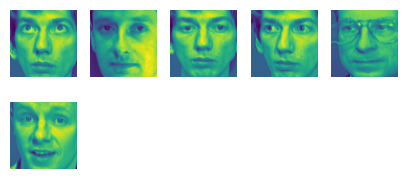

Component 2


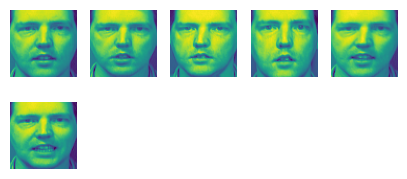

Component 3


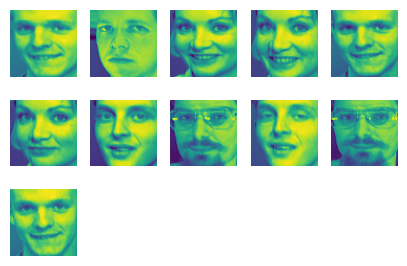

Component 4


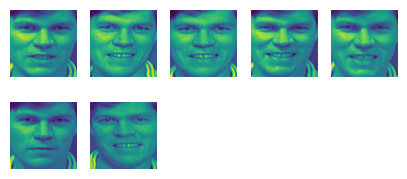

Component 5


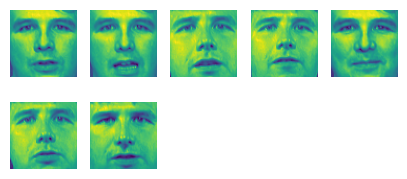

Component 6


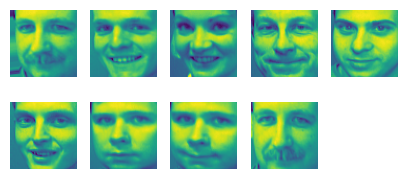

Component 7


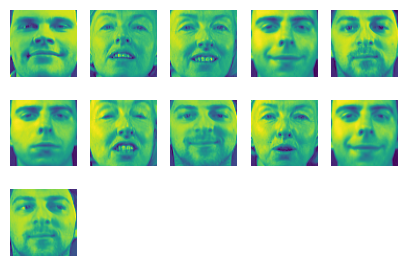

In [80]:
for component_id in range(1,8):
    faces = X_train[y_pred==component_id]
    n_rows = (len(faces) - 1) // 5 + 1
    print(f"Component {component_id}")
    plt.figure(figsize=(5, n_rows * 1.1))
    for i, face in enumerate(faces):
        plt.subplot(n_rows, 5, i + 1)
        plt.imshow(face.reshape(64, 64))
        plt.axis("off")
    plt.show()

## Tuning n components

In [47]:
pca = PCA(0.95)
X_train_reduced = pca.fit_transform(X_train)

In [48]:
gms_per_n_comps = [GaussianMixture(k, n_init=5,random_state=42).fit(X_train_reduced) for k in range(1, 45, 1)]

### BIC

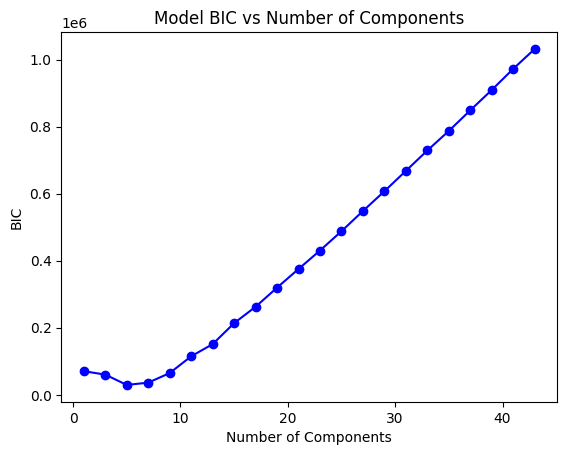

In [46]:
bics_per_n_comps = [gm.bic(X_train_reduced) for gm in gms_per_n_comps]

plt.plot(range(1, 45, 1), bics_per_n_comps, "bo-")
plt.title("Model BIC vs Number of Components")
plt.xlabel("Number of Components")
plt.ylabel("BIC")
plt.show()

### AIC

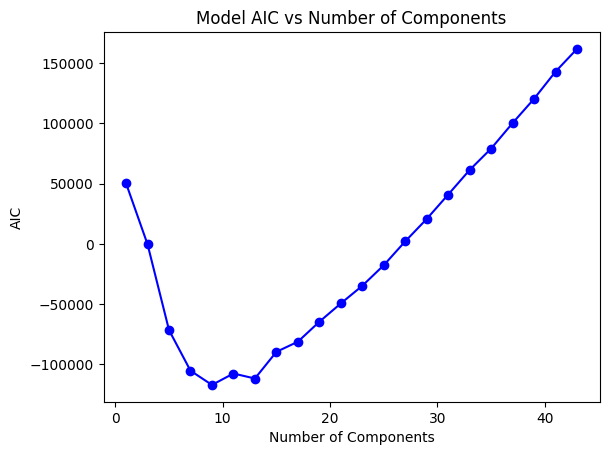

In [45]:
aics_per_n_comps = [gm.aic(X_train_reduced) for gm in gms_per_n_comps]

plt.plot(range(1, 45, 1), aics_per_n_comps, "bo-")
plt.title("Model AIC vs Number of Components")
plt.xlabel("Number of Components")
plt.ylabel("AIC")
plt.show()

## Retraining with minimum AIC

In [55]:
gm = GaussianMixture(n_components=9, n_init=5,random_state=42)
gm.fit(X_train_reduced)

GaussianMixture(n_components=9, n_init=5, random_state=42)

In [56]:
y_pred = gm.predict(X_train_reduced)

Component 0


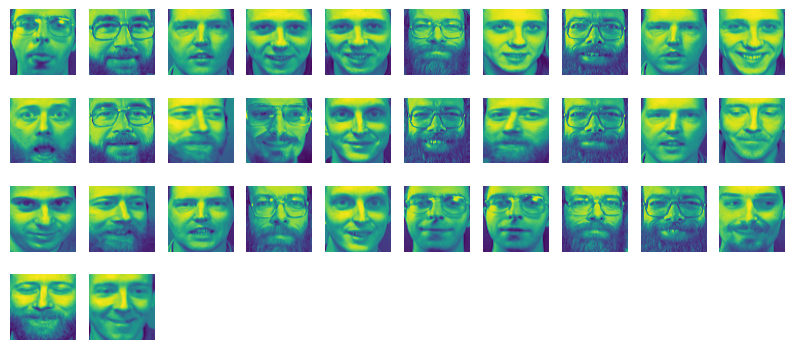

Component 1


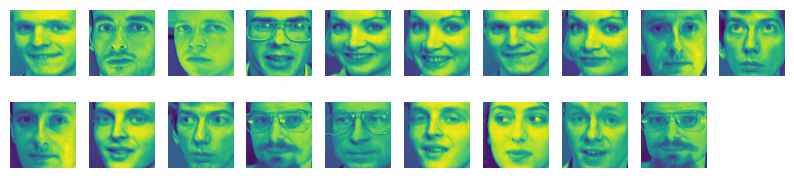

Component 2


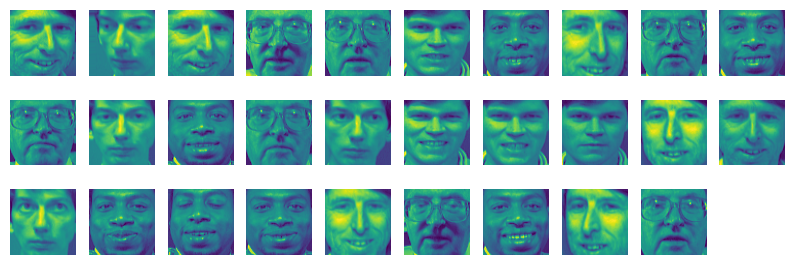

Component 3


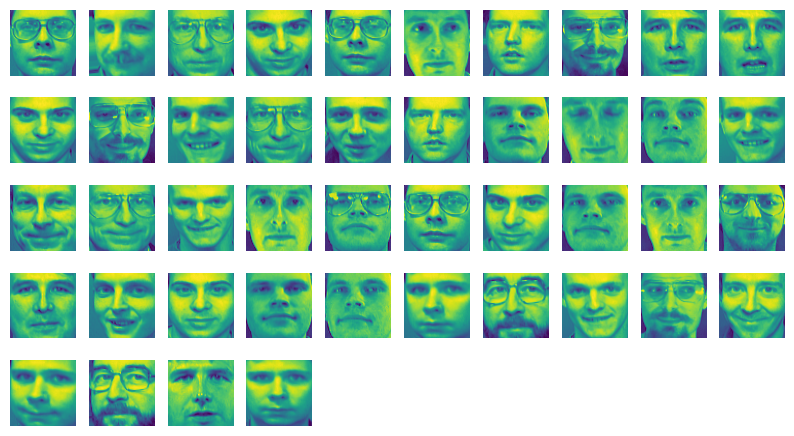

Component 4


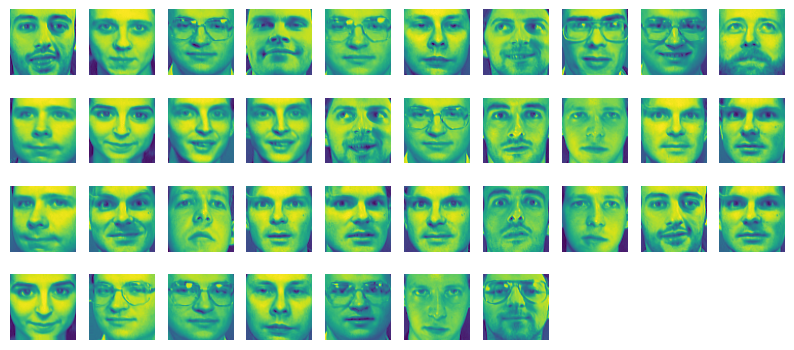

Component 5


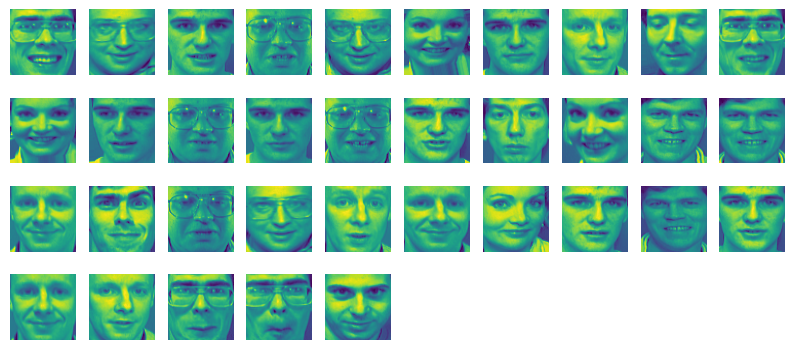

Component 6


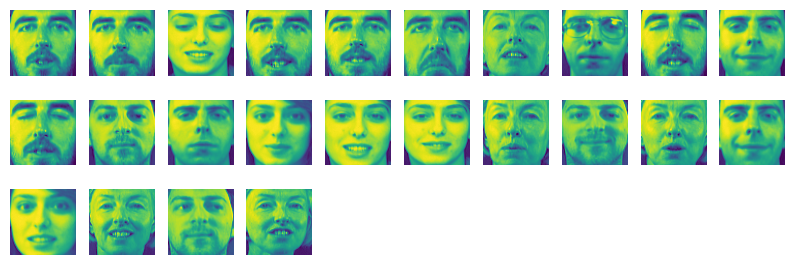

Component 7


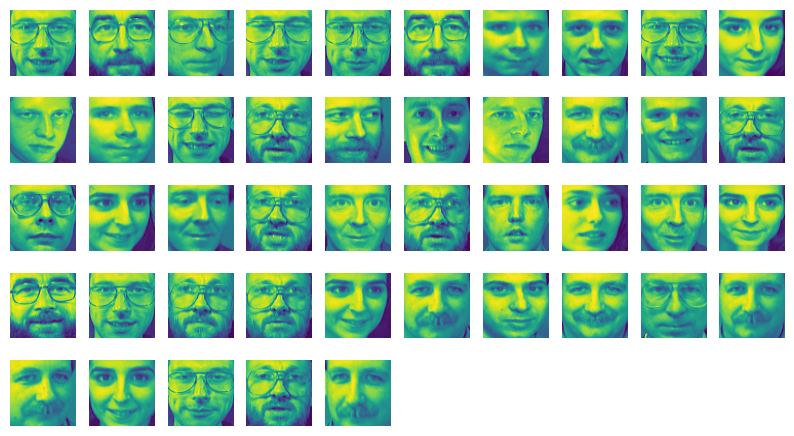

Component 8


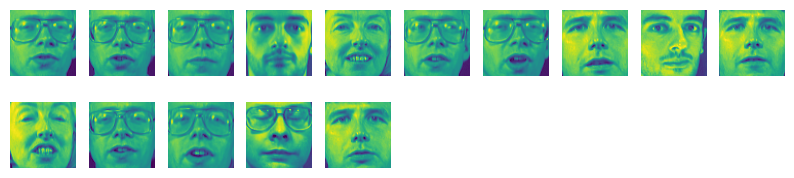

In [60]:
for component_id in range(0,9):
    faces = X_train[y_pred==component_id]
    n_rows = (len(faces) - 1) // 10 + 1
    print(f"Component {component_id}")
    plt.figure(figsize=(10, n_rows * 1.1))
    for i, face in enumerate(faces):
        plt.subplot(n_rows, 10, i + 1)
        plt.imshow(face.reshape(64, 64))
        plt.axis("off")
    plt.show()

BIC and AIC did not work well

### Bayesian Gaussian Mixture model

In [84]:
from sklearn.mixture import BayesianGaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

pca = PCA(0.99)

prep_pipeline = make_pipeline(StandardScaler(), PCA(0.99)) 
X_train_prepped = prep_pipeline.fit_transform(X_train)
bgm = BayesianGaussianMixture(n_components=100, n_init=10, random_state=42)
bgm.fit(X_train_prepped, y_train)

BayesianGaussianMixture(n_components=100, n_init=10, random_state=42)